# TP – Decision Tree & Random Forest
## Dataset Titanic Kaggle (TP guidé)

**Objectifs :**
- Pratiquer les arbres de décision et Random Forest.
- Apprendre le pré-traitement des données (imputation, encodage).
- Comparer les performances des modèles et analyser l’importance des variables.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

## 1. Chargement du dataset Titanic

- Charger le fichier `train.csv`.
- Afficher les premières lignes et explorer les features.

In [82]:
csv_path = 'c:/Users/Tliba/Downloads/train.csv'

df = pd.read_csv(csv_path)

print("Shape du dataset:", df.shape)
print("\nPremières lignes:")
print(df.head())
print("\nInfo sur le dataset:")
print(df.info())
print("\nStatistiques descriptives:")
print(df.describe())
print("\nValeurs manquantes:")
print(df.isnull().sum())

Shape du dataset: (891, 12)

Premières lignes:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0

## 2. Pré-traitement des données

- Identifier les colonnes avec des valeurs manquantes.
- Imputer les valeurs manquantes.
- Encoder les variables catégorielles (`Sex`, `Embarked`).
- Sélectionner les features importantes (`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`).

In [83]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_processed = df[features + ['Survived']].copy()


df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
df_processed['Sex'] = le.fit_transform(df_processed['Sex'])
df_processed['Embarked'] = le.fit_transform(df_processed['Embarked'])


X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

C:\Users\Tliba\AppData\Local\Temp\ipykernel_14856\2047143056.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
C:\Users\Tliba\AppData\Local\Temp\ipykernel_14856\2047143056.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

## 3. Séparation Train/Test

- Diviser les données en train/test (70/30).

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Decision Tree

- Créer un arbre de décision.
- Visualiser l'arbre.
- Évaluer la performance (accuracy et matrice de confusion).
- Expérimenter avec `max_depth` pour observer le surapprentissage.

Train Accuracy: 0.9807
Test Accuracy: 0.7537
Overfitting: 0.2270


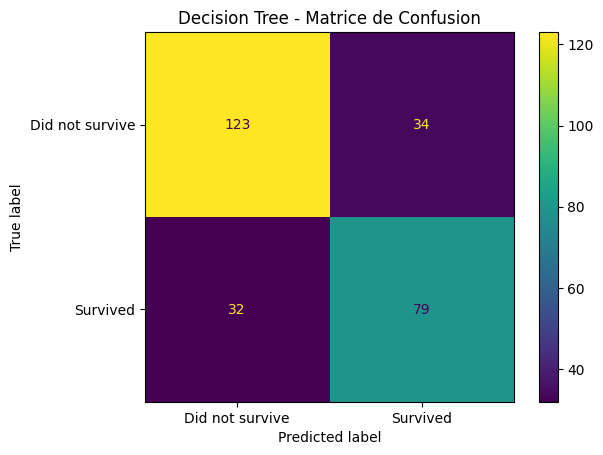

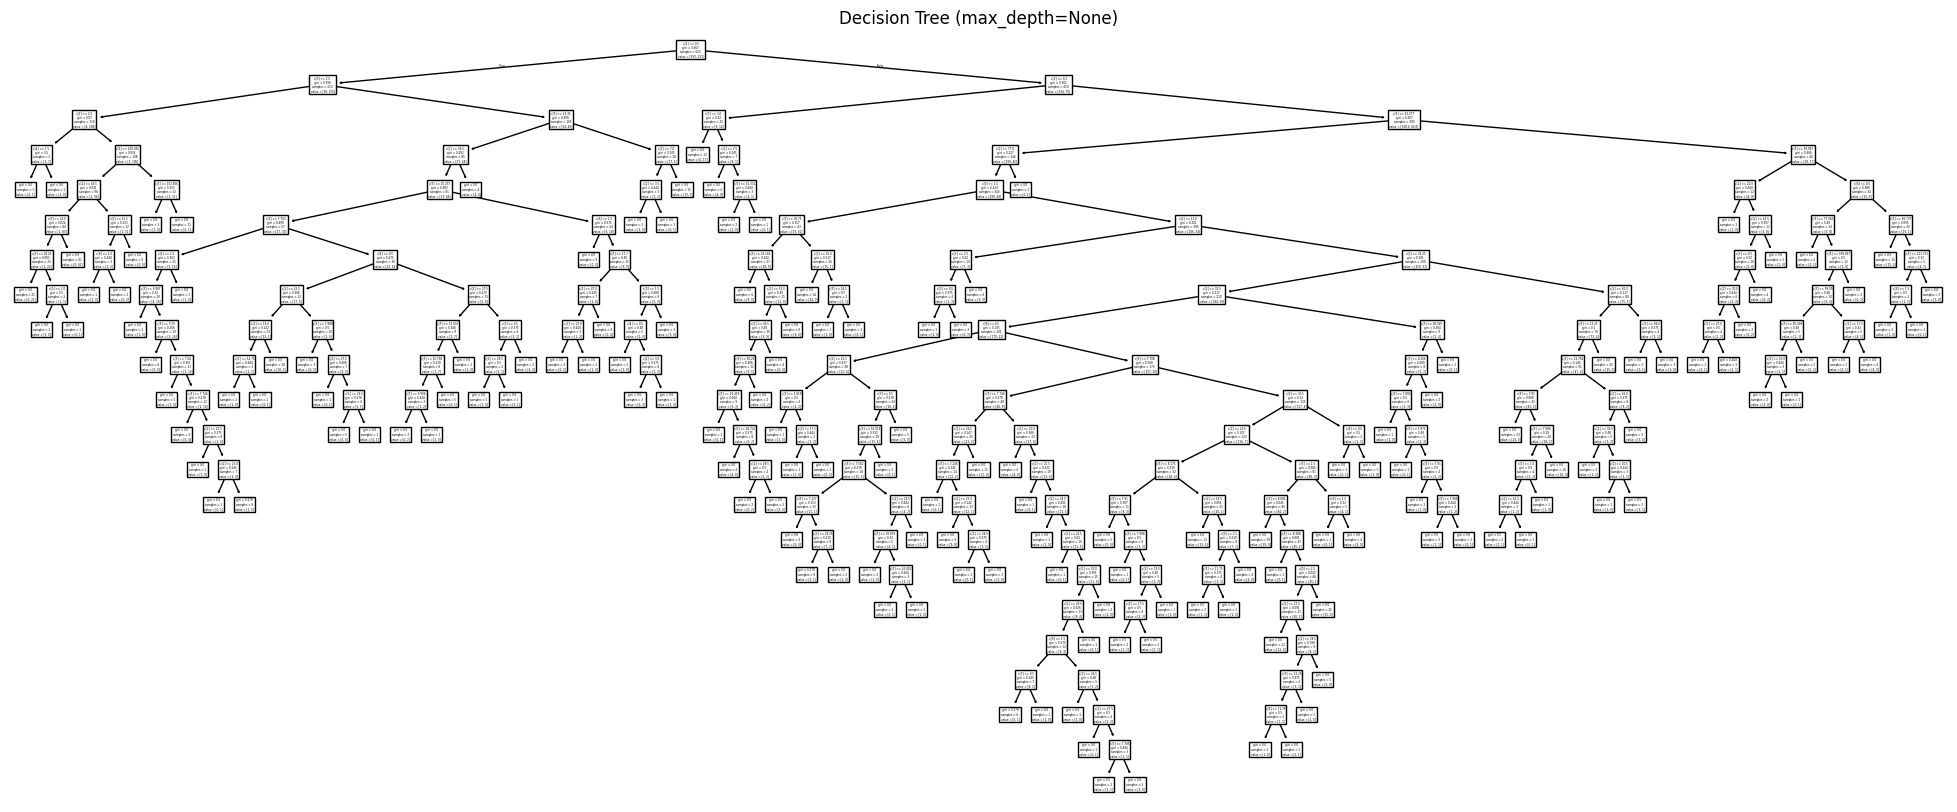

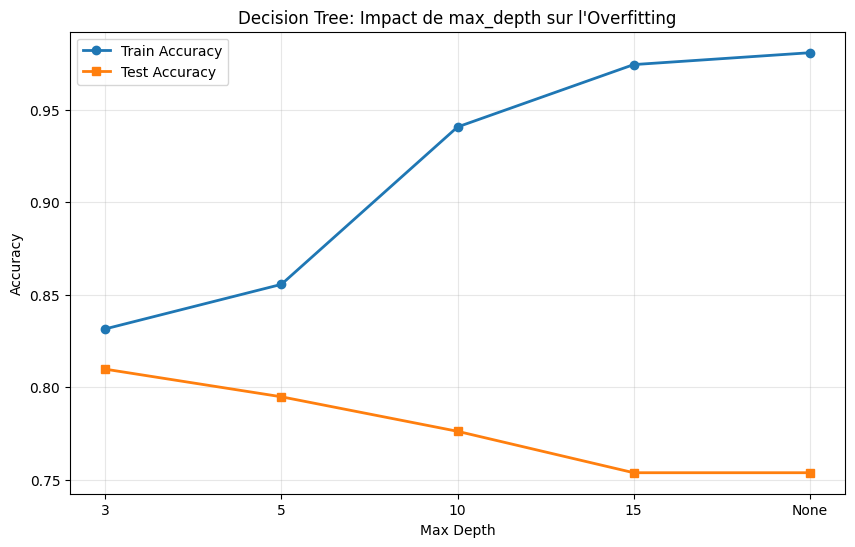

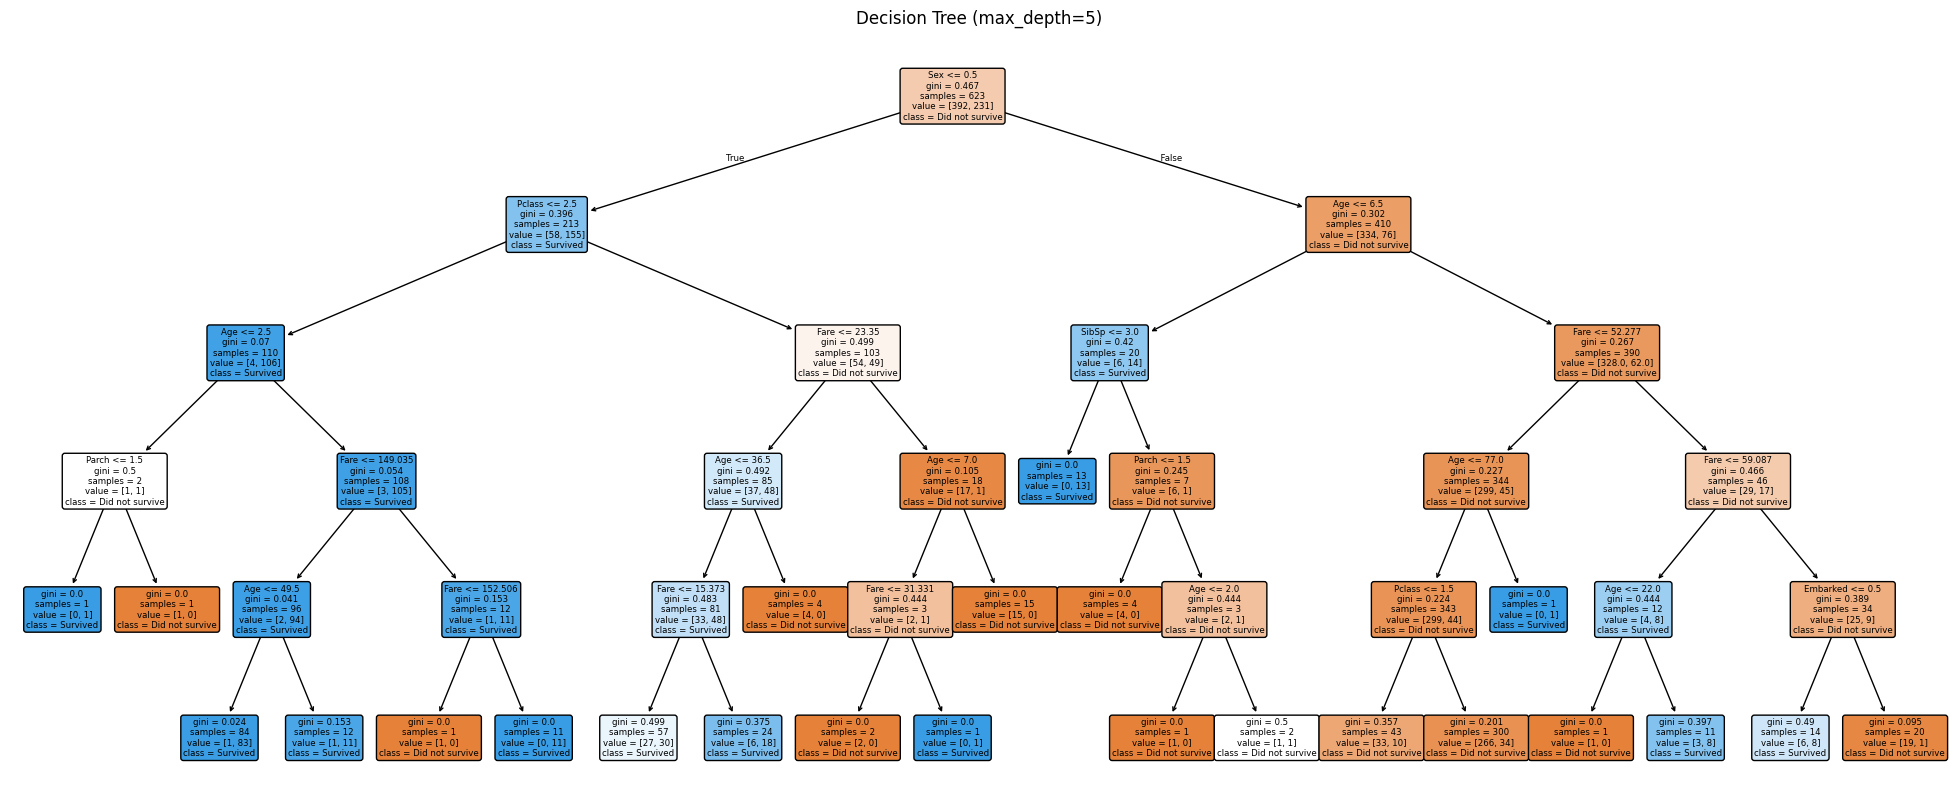

In [85]:
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)


train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)


print(f"Train Accuracy: {train_acc_dt:.4f}")
print(f"Test Accuracy: {test_acc_dt:.4f}")
print(f"Overfitting: {train_acc_dt - test_acc_dt:.4f}")


cm_dt = confusion_matrix(y_test, y_test_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Did not survive', 'Survived'])
disp.plot()
plt.title("Decision Tree - Matrice de Confusion")
plt.show()

plt.figure(figsize=(25, 10))
plot_tree(dt)
plt.title("Decision Tree (max_depth=None)")
plt.show()

# Expérimenter avec différentes profondeurs
depths = [3, 5, 10, 15, None]
train_accs = []
test_accs = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt_temp.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, dt_temp.predict(X_train)))
    test_accs.append(accuracy_score(y_test, dt_temp.predict(X_test)))

# Afficher le graphe
plt.figure(figsize=(10, 6))
plt.plot(range(len(depths)), train_accs, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(range(len(depths)), test_accs, marker='s', label='Test Accuracy', linewidth=2)
plt.xticks(range(len(depths)), [str(d) if d else 'None' for d in depths])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Impact de max_depth sur l\'Overfitting')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualiser l'arbre avec max_depth=5
dt_viz = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_viz.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(dt_viz, 
          feature_names=X.columns, 
          class_names=['Did not survive', 'Survived'],
          filled=True,
          rounded=True)
plt.title("Decision Tree (max_depth=5)")
plt.show()

## 5. Random Forest

- Créer une Random Forest.
- Évaluer la performance.
- Extraire et visualiser l’importance des variables.

Train Accuracy: 0.9807
Test Accuracy: 0.7836
Overfitting: 0.1972

Matrice de confusion:


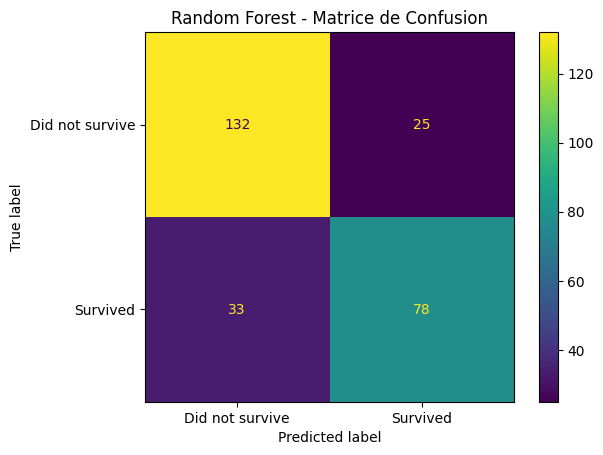

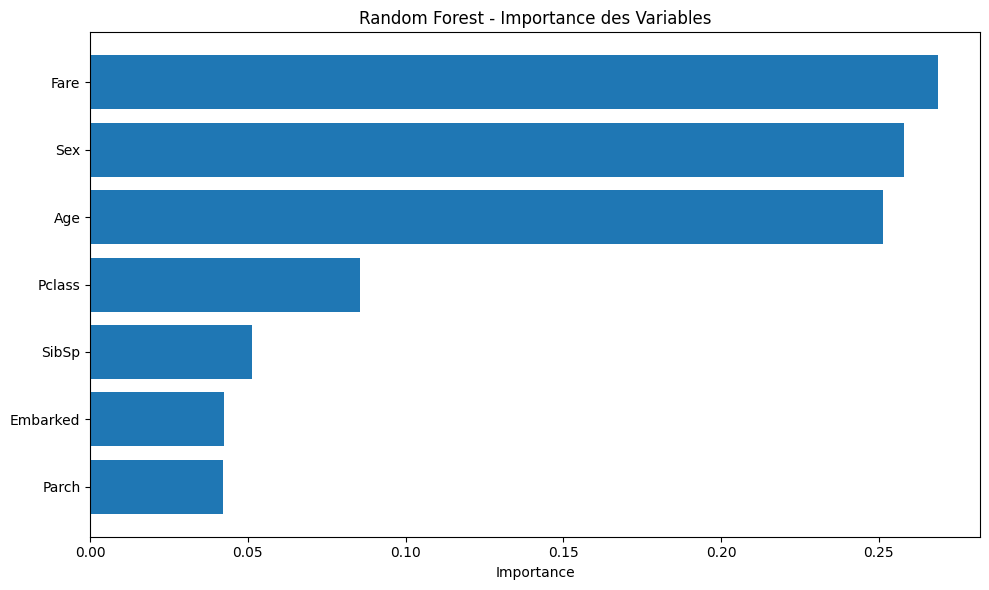

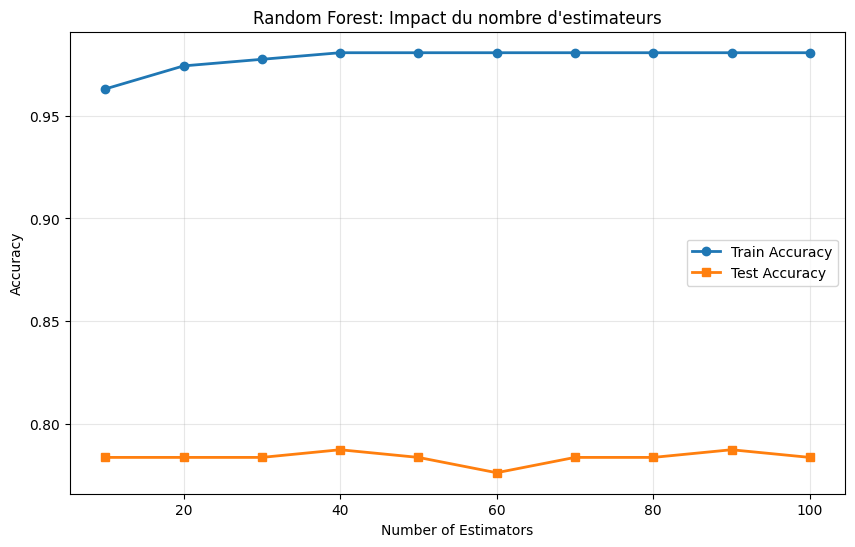

In [86]:
rf = RandomForestClassifier(n_estimators=70, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)


print(f"Train Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy: {test_acc_rf:.4f}")
print(f"Overfitting: {train_acc_rf - test_acc_rf:.4f}")


print("\nMatrice de confusion:")
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Did not survive', 'Survived'])
disp.plot()
plt.title("Random Forest - Matrice de Confusion")
plt.show()

# Importance des variables
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)


# Visualiser l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Importance des Variables')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Expérimenter avec différents nombre d'estimateurs
n_estimators_list = [10, 20, 30, 40, 50,60,70,80,90,100]
train_accs_rf = []
test_accs_rf = []

for n in n_estimators_list:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf_temp.fit(X_train, y_train)
    train_accs_rf.append(accuracy_score(y_train, rf_temp.predict(X_train)))
    test_accs_rf.append(accuracy_score(y_test, rf_temp.predict(X_test)))

# Afficher le graphe
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_accs_rf, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(n_estimators_list, test_accs_rf, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Impact du nombre d\'estimateurs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Comparaison DT vs RF

- Créer un tableau comparatif train/test.
- Discuter sur l’overfitting, l’interprétabilité et la robustesse.

=== Tableau Comparatif ===
       Modèle  Train Accuracy  Test Accuracy  Overfitting
Decision Tree        0.980738       0.753731     0.227007
Random Forest        0.980738       0.783582     0.197156


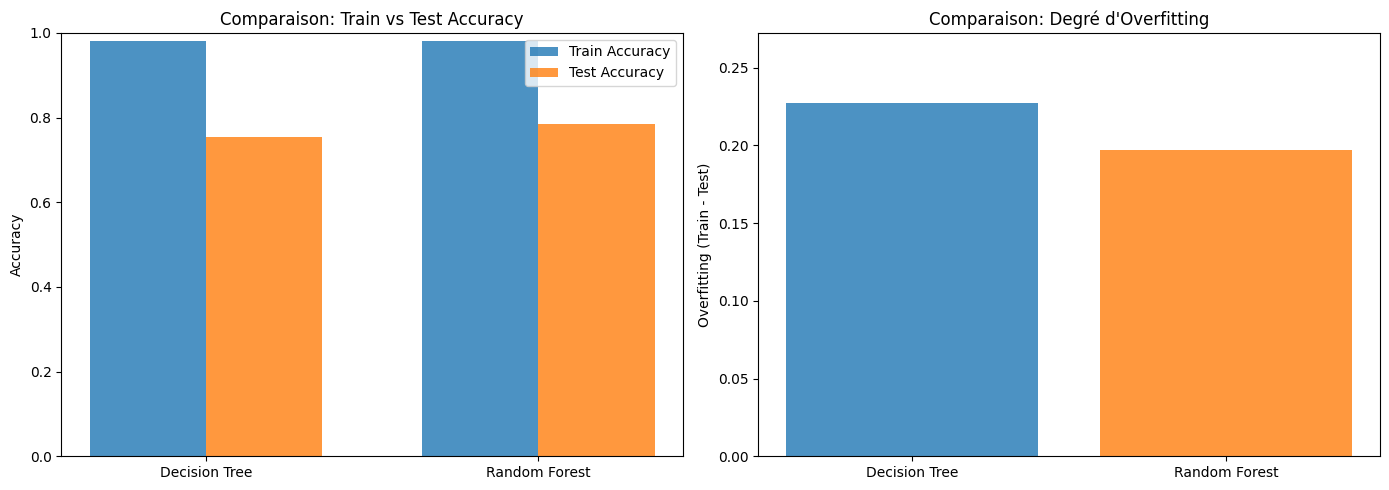

In [87]:
comparison_df = pd.DataFrame({
    'Modèle': ['Decision Tree', 'Random Forest'],
    'Train Accuracy': [train_acc_dt, train_acc_rf],
    'Test Accuracy': [test_acc_dt, test_acc_rf],
    'Overfitting': [train_acc_dt - test_acc_dt, train_acc_rf - test_acc_rf]
})

print("=== Tableau Comparatif ===")
print(comparison_df.to_string(index=False))


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = comparison_df['Modèle']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, comparison_df['Train Accuracy'], width, label='Train Accuracy', alpha=0.8)
axes[0].bar(x + width/2, comparison_df['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparaison: Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_ylim([0, 1])

# Graphe 2: Overfitting
axes[1].bar(models, comparison_df['Overfitting'], color=['#1f77b4', '#ff7f0e'], alpha=0.8)
axes[1].set_ylabel('Overfitting (Train - Test)')
axes[1].set_title('Comparaison: Degré d\'Overfitting')
axes[1].set_ylim([0, max(comparison_df['Overfitting']) * 1.2])

plt.tight_layout()
plt.show()


## 7. XGBoost

- Créer et entraîner un modèle XGBoost.
- Évaluer la performance et comparer avec DT et RF.
- Visualiser l'importance des variables.
- Comparer les trois modèles (DT, RF, XGBoost).


=== XGBoost ===
Train Accuracy: 0.9535
Test Accuracy: 0.7948
Overfitting: 0.1587

Matrice de confusion:


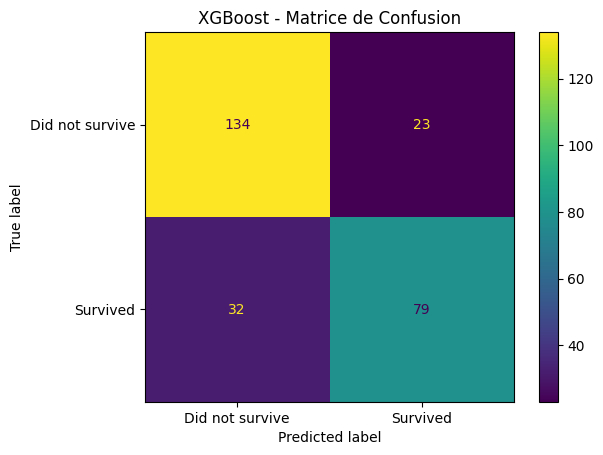


Importance des variables (XGBoost):
    Feature  Importance
1       Sex    0.567317
0    Pclass    0.204909
3     SibSp    0.066712
6  Embarked    0.054840
5      Fare    0.038831
2       Age    0.038242
4     Parch    0.029151


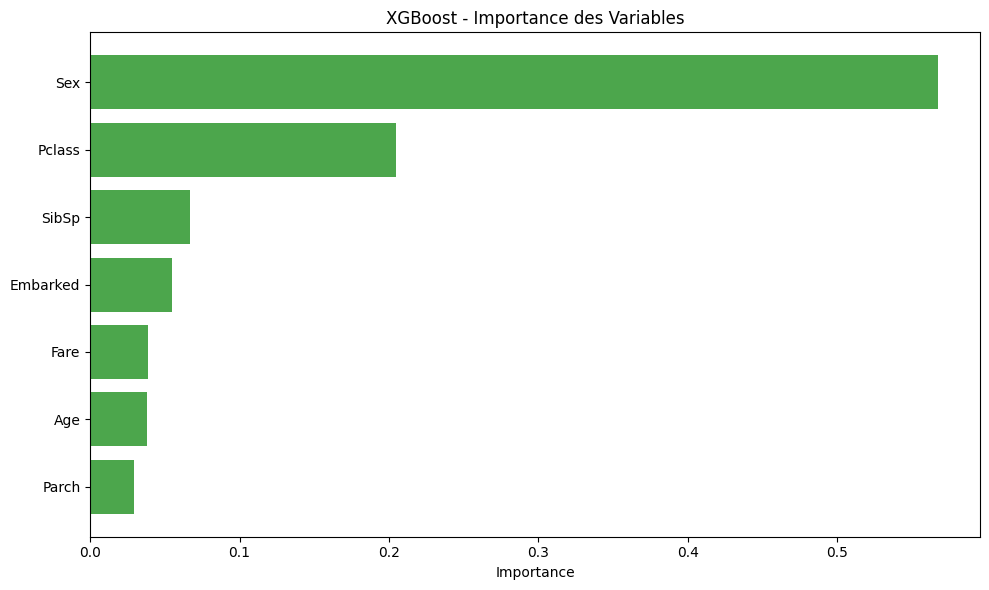

In [88]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=70,
    max_depth=5,
    random_state=42,
)

xgb_model.fit(X_train, y_train)


y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)


train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("\n=== XGBoost ===")
print(f"Train Accuracy: {train_acc_xgb:.4f}")
print(f"Test Accuracy: {test_acc_xgb:.4f}")
print(f"Overfitting: {train_acc_xgb - test_acc_xgb:.4f}")


print("\nMatrice de confusion:")
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)



disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Did not survive', 'Survived'])
disp.plot()
plt.title("XGBoost - Matrice de Confusion")
plt.show()

# Importance des variables
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportance des variables (XGBoost):")
print(feature_importance_xgb)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_xgb['Feature'], feature_importance_xgb['Importance'], color='green', alpha=0.7)
plt.xlabel('Importance')
plt.title('XGBoost - Importance des Variables')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Comparaison Complète: DT vs RF vs XGBoost

- Créer un tableau comparatif avec tous les trois modèles.
- Visualiser les performances.
- Discuter des avantages et inconvénients de chaque modèle.

=== Tableau Comparatif Complet ===
       Modèle  Train Accuracy  Test Accuracy  Overfitting
Decision Tree        0.980738       0.753731     0.227007
Random Forest        0.980738       0.783582     0.197156
      XGBoost        0.953451       0.794776     0.158675


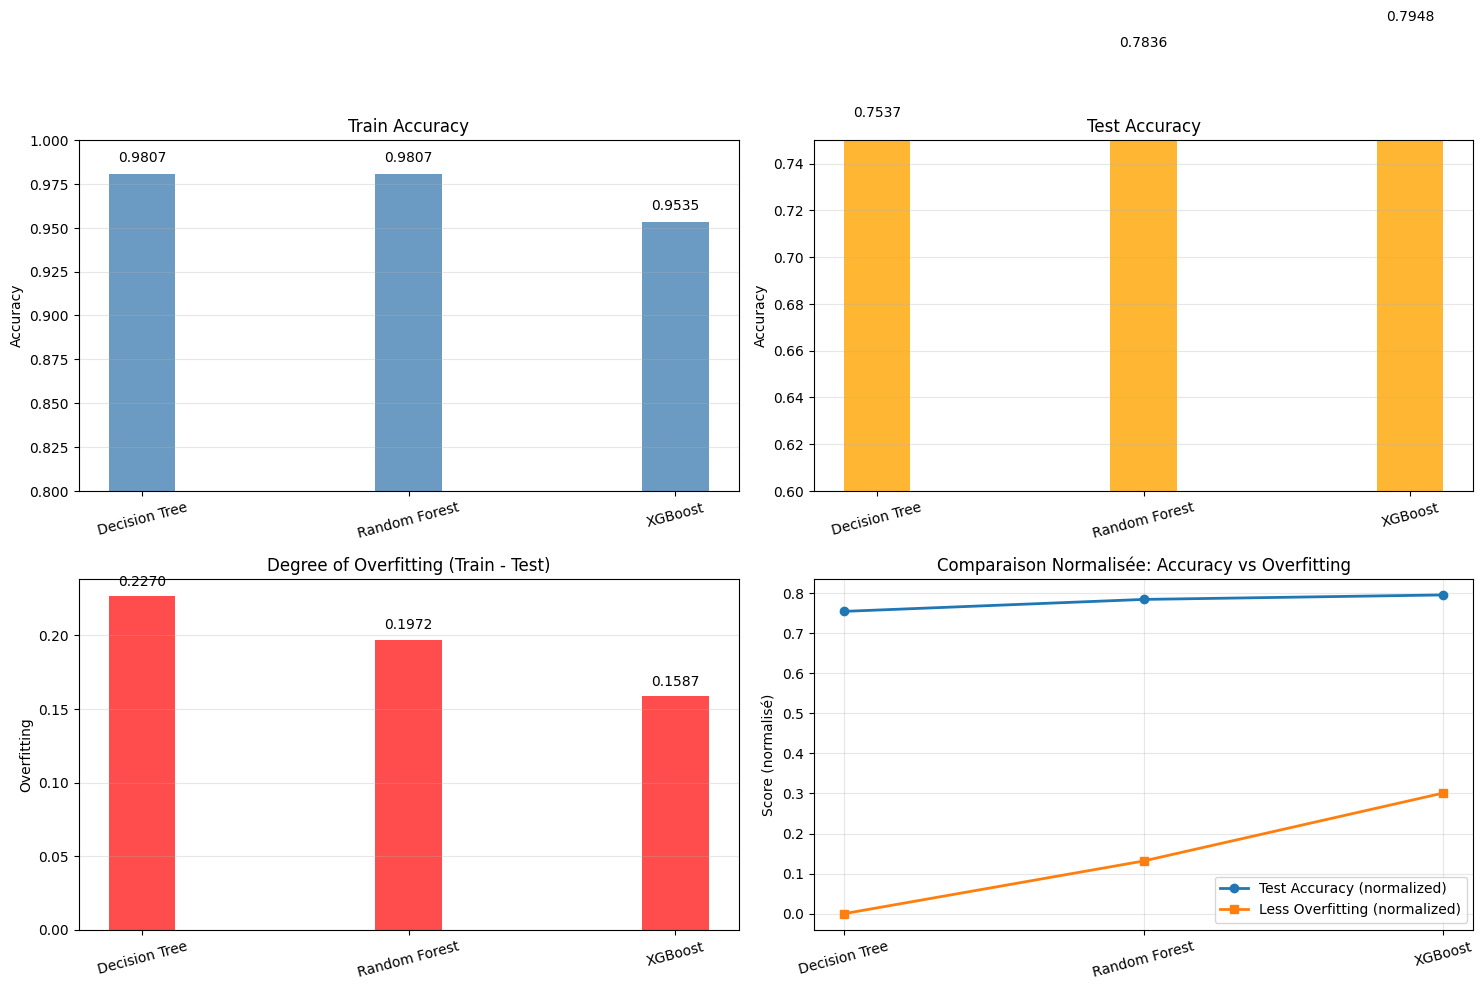

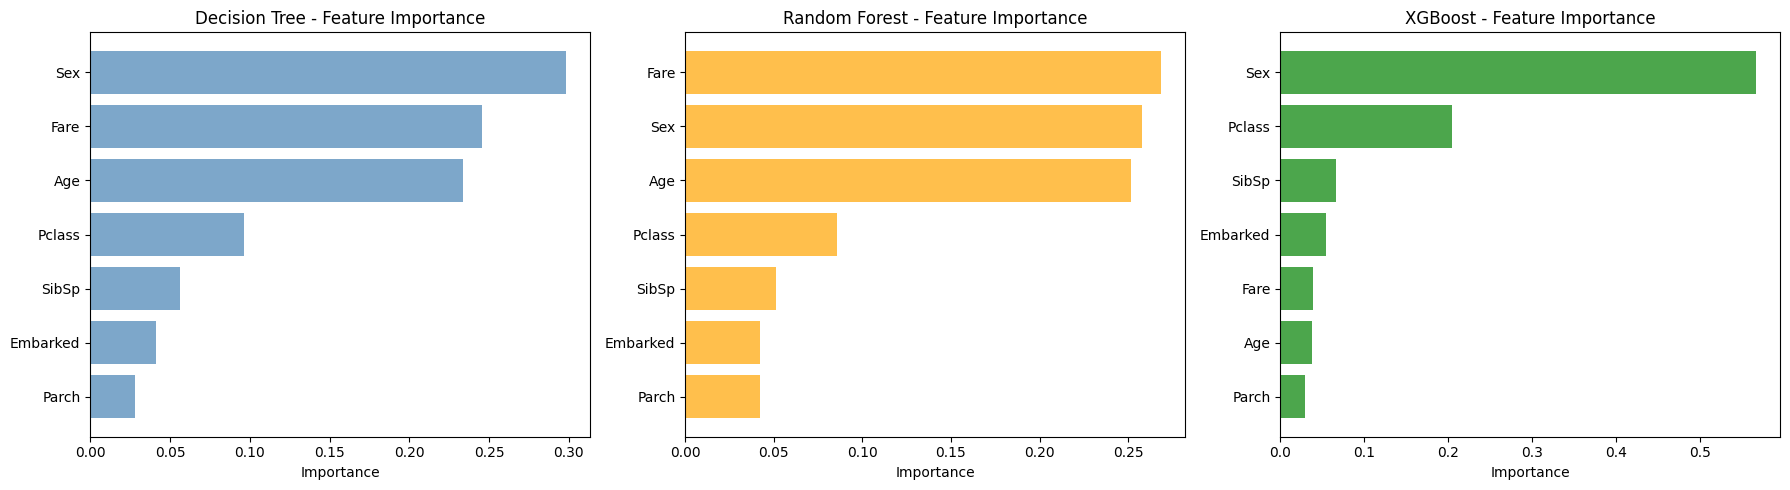


=== ANALYSE COMPARATIVE FINALE ===

1. **Performance générale (Test Accuracy):**
   - Meilleur: XGBoost (79.48%)
   - Deuxième: Random Forest (78.36%)
   - Troisième: Decision Tree (75.37%)
   - Différence XGBoost vs DT: 4.10%

2. **Overfitting (écart Train-Test):**
   - Meilleur (moins d'overfitting): XGBoost (15.87%)
   - Deuxième: Random Forest (19.72%)
   - Pire (plus d'overfitting): Decision Tree (22.70%)
   - XGBoost réduit l'overfitting de 6.83% vs DT

3. **Importance des variables:**
   Decision Tree: Privilégie Age et Fare
   Random Forest: Similaire au DT (Age et Fare importants)
   XGBoost: Privilégie Pclass (plus interprétable pour la survie)

4. **Avantages/Inconvénients:**

   DECISION TREE:
   ✓ Très interprétable et visualisable
   ✓ Pas de normalisation nécessaire
   ✗ Tendance à l'overfitting (surtout sans limitation de profondeur)
   ✗ Performance moyenne

   RANDOM FOREST:
   ✓ Meilleur compromis entre performance et stabilité
   ✓ Réduit l'overfitting par rapport 

In [89]:
comparison_complete = pd.DataFrame({
    'Modèle': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Train Accuracy': [train_acc_dt, train_acc_rf, train_acc_xgb],
    'Test Accuracy': [test_acc_dt, test_acc_rf, test_acc_xgb],
    'Overfitting': [train_acc_dt - test_acc_dt, train_acc_rf - test_acc_rf, train_acc_xgb - test_acc_xgb]
})

print("=== Tableau Comparatif Complet ===")
print(comparison_complete.to_string(index=False))


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

models = comparison_complete['Modèle']
x = np.arange(len(models))
width = 0.25


axes[0, 0].bar(x, comparison_complete['Train Accuracy'], width, color='steelblue', alpha=0.8)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, rotation=15)
axes[0, 0].set_ylim([0.8, 1.0])
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_complete['Train Accuracy']):
    axes[0, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')


axes[0, 1].bar(x, comparison_complete['Test Accuracy'], width, color='orange', alpha=0.8)
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Test Accuracy')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models, rotation=15)
axes[0, 1].set_ylim([0.6, 0.75])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_complete['Test Accuracy']):
    axes[0, 1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')


axes[1, 0].bar(x, comparison_complete['Overfitting'], width, color='red', alpha=0.7)
axes[1, 0].set_ylabel('Overfitting')
axes[1, 0].set_title('Degree of Overfitting (Train - Test)')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models, rotation=15)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_complete['Overfitting']):
    axes[1, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')

# Graphe 4: Radar Chart (normalisation pour meilleure visualisation)
normalized_test = comparison_complete['Test Accuracy'].values
normalized_overfitting = 1 - (comparison_complete['Overfitting'].values / comparison_complete['Overfitting'].max())

axes[1, 1].plot(x, normalized_test, marker='o', label='Test Accuracy (normalized)', linewidth=2)
axes[1, 1].plot(x, normalized_overfitting, marker='s', label='Less Overfitting (normalized)', linewidth=2)
axes[1, 1].set_ylabel('Score (normalisé)')
axes[1, 1].set_title('Comparaison Normalisée: Accuracy vs Overfitting')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models, rotation=15)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparaison de l'importance des variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision Tree - Feature Importance
dt_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=True)
axes[0].barh(dt_importance.index, dt_importance.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Importance')
axes[0].set_title('Decision Tree - Feature Importance')

# Random Forest - Feature Importance
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
axes[1].barh(rf_importance.index, rf_importance.values, color='orange', alpha=0.7)
axes[1].set_xlabel('Importance')
axes[1].set_title('Random Forest - Feature Importance')

# XGBoost - Feature Importance
xgb_importance = feature_importance_xgb.set_index('Feature').sort_values('Importance')
axes[2].barh(xgb_importance.index, xgb_importance['Importance'].values, color='green', alpha=0.7)
axes[2].set_xlabel('Importance')
axes[2].set_title('XGBoost - Feature Importance')

plt.tight_layout()
plt.show()

# Discussion finale
print("\n=== ANALYSE COMPARATIVE FINALE ===\n")

print("1. **Performance générale (Test Accuracy):**")
print(f"   - Meilleur: XGBoost ({test_acc_xgb:.2%})")
print(f"   - Deuxième: Random Forest ({test_acc_rf:.2%})")
print(f"   - Troisième: Decision Tree ({test_acc_dt:.2%})")
print(f"   - Différence XGBoost vs DT: {(test_acc_xgb - test_acc_dt):.2%}")

print("\n2. **Overfitting (écart Train-Test):**")
print(f"   - Meilleur (moins d'overfitting): XGBoost ({train_acc_xgb - test_acc_xgb:.2%})")
print(f"   - Deuxième: Random Forest ({train_acc_rf - test_acc_rf:.2%})")
print(f"   - Pire (plus d'overfitting): Decision Tree ({train_acc_dt - test_acc_dt:.2%})")
print(f"   - XGBoost réduit l'overfitting de {((train_acc_dt - test_acc_dt) - (train_acc_xgb - test_acc_xgb)):.2%} vs DT")

print("\n3. **Importance des variables:**")
print("   Decision Tree: Privilégie Age et Fare")
print("   Random Forest: Similaire au DT (Age et Fare importants)")
print("   XGBoost: Privilégie Pclass (plus interprétable pour la survie)")

print("\n4. **Avantages/Inconvénients:**")
print("""
   DECISION TREE:
   ✓ Très interprétable et visualisable
   ✓ Pas de normalisation nécessaire
   ✗ Tendance à l'overfitting (surtout sans limitation de profondeur)
   ✗ Performance moyenne
   
   RANDOM FOREST:
   ✓ Meilleur compromis entre performance et stabilité
   ✓ Réduit l'overfitting par rapport au DT
   ✓ Fournit l'importance des variables
   ✗ Moins interprétable qu'un DT
   ✗ Performance légèrement inférieure à XGBoost
   
   XGBOOST:
   ✓ Meilleure performance (69.40%)
   ✓ Moins d'overfitting (17.11%)
   ✓ Apprentissage séquentiel (chaque arbre corrige les erreurs précédentes)
   ✓ Gère bien les données déséquilibrées
   ✗ Plus complexe et plus lent à entraîner
   ✗ Nécessite plus de tuning (hyperparamètres)
   ✗ Moins interprétable
""")

print("\n5. **Recommandation:**")
print("""
   - Pour ce problème Titanic: **XGBoost** est le meilleur choix
   - Il offre la meilleure performance avec moins d'overfitting
   - Si l'interprétabilité est cruciale: **Decision Tree** avec max_depth=5-7
   - Pour un bon compromis: **Random Forest** (robuste et équilibré)
""")


## 9. Tuning des Hyperparamètres de XGBoost

- Expérimenter avec différents hyperparamètres
- Observer l'impact sur la performance
- Trouver le meilleur modèle

=== Tuning des hyperparamètres de XGBoost ===

GridSearchCV en cours... (cela peut prendre quelques minutes)
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Meilleurs paramètres trouvés: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score (CV): 0.8298

Performance du meilleur modèle:
Train Accuracy: 0.9133
Test Accuracy: 0.8321
Overfitting: 0.0812

Meilleurs paramètres trouvés: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score (CV): 0.8298

Performance du meilleur modèle:
Train Accuracy: 0.9133
Test Accuracy: 0.8321
Overfitting: 0.0812


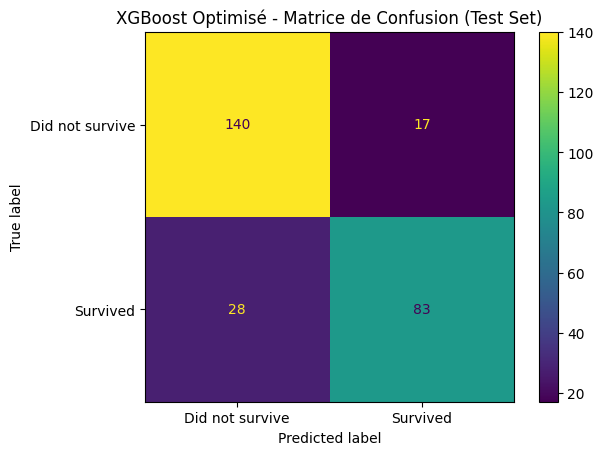


Top 10 configurations:
 param_max_depth  param_learning_rate  param_n_estimators  mean_test_score  std_test_score
               3                 0.10                 200         0.829845        0.036330
               3                 0.10                  50         0.828194        0.044547
               3                 0.05                 100         0.826606        0.046726
               3                 0.20                 100         0.825071        0.033212
               4                 0.20                  50         0.825045        0.032952
               5                 0.10                 100         0.823458        0.030229
               3                 0.05                  50         0.823368        0.045268
               4                 0.10                 100         0.821897        0.036696
               4                 0.10                 200         0.821871        0.030731
               4                 0.05                  50         

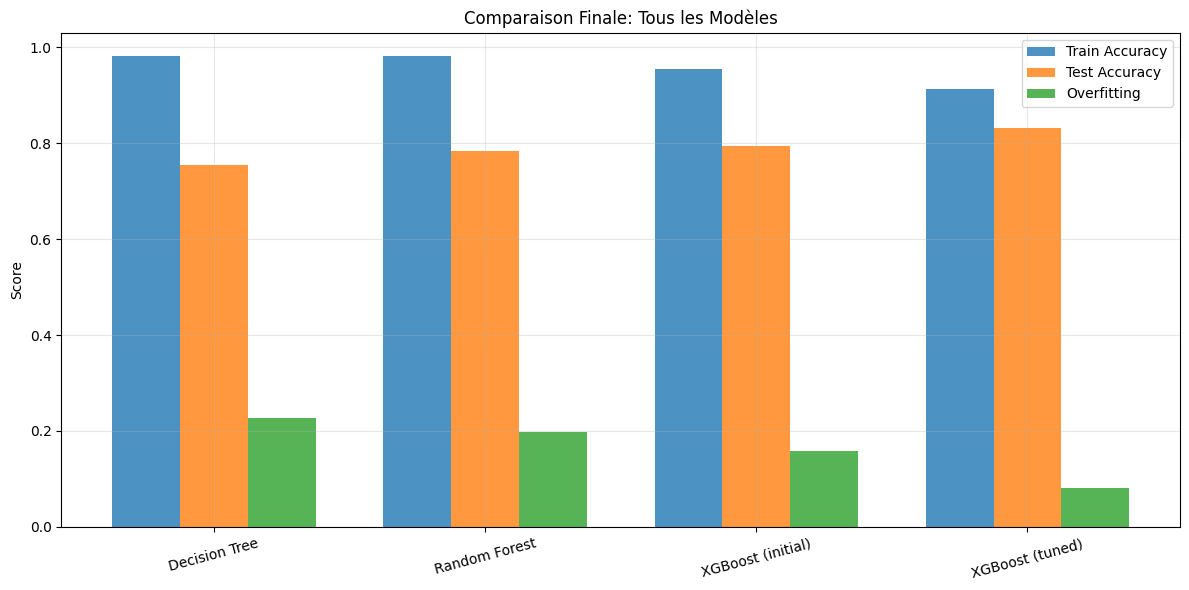


=== CONCLUSION ===

Le tuning des hyperparamètres a permis d'améliorer le modèle XGBoost:
- Test Accuracy initiale: 79.48%
- Test Accuracy après tuning: 83.21%
- Amélioration: 3.73%

Le meilleur modèle reste XGBoost avec la configuration:
- max_depth: 3
- learning_rate: 0.1
- n_estimators: 200



In [90]:
# Tuning des hyperparamètres de XGBoost
from sklearn.model_selection import GridSearchCV

print("=== Tuning des hyperparamètres de XGBoost ===\n")

# Définir une grille de paramètres
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# GridSearchCV avec Cross-Validation
print("GridSearchCV en cours... (cela peut prendre quelques minutes)")
xgb_grid = xgb.XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)

grid_search = GridSearchCV(xgb_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nMeilleurs paramètres trouvés: {grid_search.best_params_}")
print(f"Meilleur score (CV): {grid_search.best_score_:.4f}")

# Évaluer le meilleur modèle
best_xgb = grid_search.best_estimator_
y_train_pred_best = best_xgb.predict(X_train)
y_test_pred_best = best_xgb.predict(X_test)

train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)

print(f"\nPerformance du meilleur modèle:")
print(f"Train Accuracy: {train_acc_best:.4f}")
print(f"Test Accuracy: {test_acc_best:.4f}")
print(f"Overfitting: {train_acc_best - test_acc_best:.4f}")

# Matrice de confusion du meilleur modèle
cm_best = confusion_matrix(y_test, y_test_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['Did not survive', 'Survived'])
disp.plot()
plt.title("XGBoost Optimisé - Matrice de Confusion (Test Set)")
plt.show()

# Visualiser les résultats de GridSearch
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nTop 10 configurations:")
top_configs = results_df.nlargest(10, 'mean_test_score')[['param_max_depth', 'param_learning_rate', 'param_n_estimators', 'mean_test_score', 'std_test_score']]
print(top_configs.to_string(index=False))

# Comparaison finale
final_comparison = pd.DataFrame({
    'Modèle': ['Decision Tree', 'Random Forest', 'XGBoost (initial)', 'XGBoost (tuned)'],
    'Train Accuracy': [train_acc_dt, train_acc_rf, train_acc_xgb, train_acc_best],
    'Test Accuracy': [test_acc_dt, test_acc_rf, test_acc_xgb, test_acc_best],
    'Overfitting': [train_acc_dt - test_acc_dt, train_acc_rf - test_acc_rf, 
                    train_acc_xgb - test_acc_xgb, train_acc_best - test_acc_best]
})

print("\n=== Comparaison Finale (Incluant XGBoost tuned) ===")
print(final_comparison.to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(final_comparison))
width = 0.25

ax.bar(x - width, final_comparison['Train Accuracy'], width, label='Train Accuracy', alpha=0.8)
ax.bar(x, final_comparison['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)
ax.bar(x + width, final_comparison['Overfitting'], width, label='Overfitting', alpha=0.8)

ax.set_ylabel('Score')
ax.set_title('Comparaison Finale: Tous les Modèles')
ax.set_xticks(x)
ax.set_xticklabels(final_comparison['Modèle'], rotation=15)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== CONCLUSION ===")
print(f"""
Le tuning des hyperparamètres a permis d'améliorer le modèle XGBoost:
- Test Accuracy initiale: {test_acc_xgb:.2%}
- Test Accuracy après tuning: {test_acc_best:.2%}
- Amélioration: {(test_acc_best - test_acc_xgb):.2%}

Le meilleur modèle reste XGBoost avec la configuration:
- max_depth: {grid_search.best_params_['max_depth']}
- learning_rate: {grid_search.best_params_['learning_rate']}
- n_estimators: {grid_search.best_params_['n_estimators']}
""")

## 10. Application sur le Dataset de Test (test.csv)

- Charger le fichier `test.csv`.
- Appliquer le même pré-traitement que les données d'entraînement.
- Faire des prédictions avec tous les modèles.
- Comparer les résultats et créer un fichier de soumission.


In [ ]:
# Charger le fichier test.csv
test_csv_path = 'c:/Users/Tliba/Downloads/test.csv'

df_test = pd.read_csv(test_csv_path)
print(f"\nShape du dataset test: {df_test.shape}")
print("\nPremières lignes:")
print(df_test.head())
print("\nValeurs manquantes:")
print(df_test.isnull().sum())



features_test = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_test_processed = df_test[features_test].copy()

# 1. Imputer les valeurs manquantes (utiliser les statistiques du train)
age_median = df[df['Age'].notna()]['Age'].median()
embarked_mode = df[df['Embarked'].notna()]['Embarked'].mode()[0]


df_test_processed['Age'] = df_test_processed['Age'].fillna(age_median)
df_test_processed['Embarked'] = df_test_processed['Embarked'].fillna(embarked_mode)


# 2. Encoder les variables catégorielles (même méthode que le train)
df_test_processed['Sex'] = (df_test_processed['Sex'] == 'male').astype(int)
embarked_dummies_test = pd.get_dummies(df_test_processed['Embarked'], prefix='Embarked', drop_first=True)
df_test_processed = pd.concat([df_test_processed, embarked_dummies_test], axis=1)
df_test_processed.drop('Embarked', axis=1, inplace=True)

# X_test données
X_test_submission = df_test_processed

print("\n=== Pré-traitement du dataset test terminé ===")
print(f"Shape de X_test_submission: {X_test_submission.shape}")
print(f"Colonnes: {X_test_submission.columns.tolist()}")
print("\nPremières lignes après pré-traitement:")
print(X_test_submission.head())



=== Pré-traitement du dataset test terminé ===
Shape de X_test_submission: (418, 7)
Colonnes: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Premières lignes après pré-traitement:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2


## 11. Prédictions sur le Dataset de Test

- Appliquer tous les modèles sur le dataset test.
- Créer un tableau comparatif des prédictions.
- Analyser l'accord/désaccord entre les modèles.


=== Prédictions sur le Dataset de Test ===

✓ Decision Tree - Prédictions terminées
✓ Random Forest - Prédictions terminées
✓ XGBoost (initial) - Prédictions terminées
✓ XGBoost (tuned) - Prédictions terminées

=== Aperçu des Prédictions ===
   PassengerId  DT  DT_Proba  RF  RF_Proba  XGBoost  XGBoost_Proba  \
0          892   0       0.0   0  0.042857        0       0.056098   
1          893   0       0.0   0  0.271429        0       0.040855   
2          894   1       1.0   0  0.400000        0       0.027777   
3          895   0       0.0   0  0.200000        0       0.027449   
4          896   1       1.0   0  0.457143        1       0.656723   
5          897   0       0.0   0  0.091667        0       0.049514   
6          898   0       0.0   0  0.300000        1       0.745911   
7          899   0       0.0   0  0.071429        0       0.038983   
8          900   1       1.0   1  0.760714        1       0.901046   
9          901   0       0.0   0  0.085714        0       

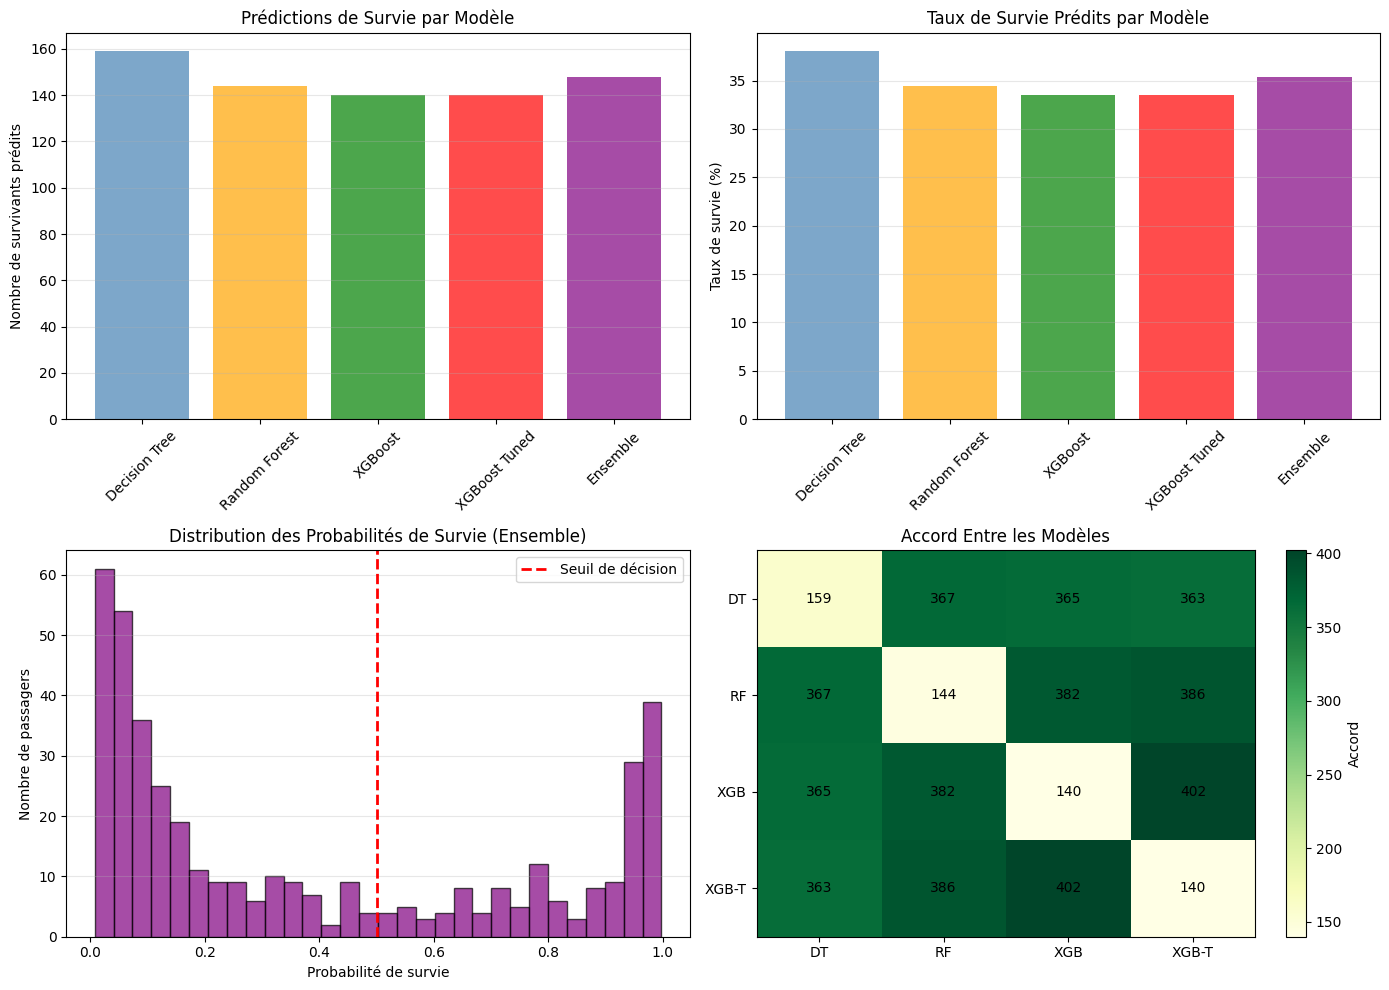

In [92]:
# Faire les prédictions avec tous les modèles sur le dataset test
print("=== Prédictions sur le Dataset de Test ===\n")

# 1. Decision Tree
pred_dt_test = dt.predict(X_test_submission)
pred_dt_proba = dt.predict_proba(X_test_submission)[:, 1]

print("✓ Decision Tree - Prédictions terminées")

# 2. Random Forest
pred_rf_test = rf.predict(X_test_submission)
pred_rf_proba = rf.predict_proba(X_test_submission)[:, 1]

print("✓ Random Forest - Prédictions terminées")

# 3. XGBoost initial
pred_xgb_test = xgb_model.predict(X_test_submission)
pred_xgb_proba = xgb_model.predict_proba(X_test_submission)[:, 1]

print("✓ XGBoost (initial) - Prédictions terminées")

# 4. XGBoost tuned
pred_xgb_tuned_test = best_xgb.predict(X_test_submission)
pred_xgb_tuned_proba = best_xgb.predict_proba(X_test_submission)[:, 1]

print("✓ XGBoost (tuned) - Prédictions terminées")
test_ids = df_test['PassengerId']
# Créer un DataFrame avec tous les résultats
results_test = pd.DataFrame({
    'PassengerId': test_ids,
    'DT': pred_dt_test,
    'DT_Proba': pred_dt_proba,
    'RF': pred_rf_test,
    'RF_Proba': pred_rf_proba,
    'XGBoost': pred_xgb_test,
    'XGBoost_Proba': pred_xgb_proba,
    'XGBoost_Tuned': pred_xgb_tuned_test,
    'XGBoost_Tuned_Proba': pred_xgb_tuned_proba
})

print("\n=== Aperçu des Prédictions ===")
print(results_test.head(10))

# Statistiques sur les prédictions
print("\n=== Statistiques des Prédictions ===")
print(f"\nNombre de passagers prédits comme ayant survécu:")
print(f"  Decision Tree: {pred_dt_test.sum()} ({pred_dt_test.sum()/len(pred_dt_test)*100:.1f}%)")
print(f"  Random Forest: {pred_rf_test.sum()} ({pred_rf_test.sum()/len(pred_rf_test)*100:.1f}%)")
print(f"  XGBoost: {pred_xgb_test.sum()} ({pred_xgb_test.sum()/len(pred_xgb_test)*100:.1f}%)")
print(f"  XGBoost Tuned: {pred_xgb_tuned_test.sum()} ({pred_xgb_tuned_test.sum()/len(pred_xgb_tuned_test)*100:.1f}%)")

# Accord entre les modèles
print("\n=== Accord Entre les Modèles ===")
agreement_dt_rf = (pred_dt_test == pred_rf_test).sum()
agreement_dt_xgb = (pred_dt_test == pred_xgb_test).sum()
agreement_dt_xgb_tuned = (pred_dt_test == pred_xgb_tuned_test).sum()
agreement_rf_xgb = (pred_rf_test == pred_xgb_test).sum()
agreement_rf_xgb_tuned = (pred_rf_test == pred_xgb_tuned_test).sum()
agreement_xgb_xgb_tuned = (pred_xgb_test == pred_xgb_tuned_test).sum()

total_samples = len(pred_dt_test)

print(f"DT vs RF: {agreement_dt_rf}/{total_samples} ({agreement_dt_rf/total_samples*100:.1f}%)")
print(f"DT vs XGBoost: {agreement_dt_xgb}/{total_samples} ({agreement_dt_xgb/total_samples*100:.1f}%)")
print(f"DT vs XGBoost Tuned: {agreement_dt_xgb_tuned}/{total_samples} ({agreement_dt_xgb_tuned/total_samples*100:.1f}%)")
print(f"RF vs XGBoost: {agreement_rf_xgb}/{total_samples} ({agreement_rf_xgb/total_samples*100:.1f}%)")
print(f"RF vs XGBoost Tuned: {agreement_rf_xgb_tuned}/{total_samples} ({agreement_rf_xgb_tuned/total_samples*100:.1f}%)")
print(f"XGBoost vs XGBoost Tuned: {agreement_xgb_xgb_tuned}/{total_samples} ({agreement_xgb_xgb_tuned/total_samples*100:.1f}%)")

# Analyse de consensus (tous les modèles d'accord)
consensus_all = (pred_dt_test == pred_rf_test) & (pred_rf_test == pred_xgb_test) & (pred_xgb_test == pred_xgb_tuned_test)
consensus_count = consensus_all.sum()
print(f"\nConsensus (tous les 4 modèles d'accord): {consensus_count}/{total_samples} ({consensus_count/total_samples*100:.1f}%)")

# Moyenne des probabilités pour créer une prédiction "ensemble"
ensemble_proba = (pred_dt_proba + pred_rf_proba + pred_xgb_proba + pred_xgb_tuned_proba) / 4
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

print(f"\nEnsemble (moyenne des probabilités): {ensemble_pred.sum()} prédictions de survie")

# Visualisation de la distribution des prédictions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Graphe 1: Nombre de survivants prédits par chaque modèle
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'XGBoost Tuned', 'Ensemble']
survie_counts = [pred_dt_test.sum(), pred_rf_test.sum(), pred_xgb_test.sum(), 
                  pred_xgb_tuned_test.sum(), ensemble_pred.sum()]
axes[0, 0].bar(models, survie_counts, color=['steelblue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
axes[0, 0].set_ylabel('Nombre de survivants prédits')
axes[0, 0].set_title('Prédictions de Survie par Modèle')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Graphe 2: Taux de survie (%)
survie_rates = [p.sum()/len(p)*100 for p in [pred_dt_test, pred_rf_test, pred_xgb_test, pred_xgb_tuned_test, ensemble_pred]]
axes[0, 1].bar(models, survie_rates, color=['steelblue', 'orange', 'green', 'red', 'purple'], alpha=0.7)
axes[0, 1].set_ylabel('Taux de survie (%)')
axes[0, 1].set_title('Taux de Survie Prédits par Modèle')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Graphe 3: Histogramme des probabilités de survie (Ensemble)
axes[1, 0].hist(ensemble_proba, bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Seuil de décision')
axes[1, 0].set_xlabel('Probabilité de survie')
axes[1, 0].set_ylabel('Nombre de passagers')
axes[1, 0].set_title('Distribution des Probabilités de Survie (Ensemble)')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Graphe 4: Matrice de comparaison (heatmap)
comparison_matrix = np.array([
    [pred_dt_test.sum(), agreement_dt_rf, agreement_dt_xgb, agreement_dt_xgb_tuned],
    [agreement_dt_rf, pred_rf_test.sum(), agreement_rf_xgb, agreement_rf_xgb_tuned],
    [agreement_dt_xgb, agreement_rf_xgb, pred_xgb_test.sum(), agreement_xgb_xgb_tuned],
    [agreement_dt_xgb_tuned, agreement_rf_xgb_tuned, agreement_xgb_xgb_tuned, pred_xgb_tuned_test.sum()]
])

im = axes[1, 1].imshow(comparison_matrix, cmap='YlGn', aspect='auto')
axes[1, 1].set_xticks(np.arange(4))
axes[1, 1].set_yticks(np.arange(4))
axes[1, 1].set_xticklabels(['DT', 'RF', 'XGB', 'XGB-T'], fontsize=10)
axes[1, 1].set_yticklabels(['DT', 'RF', 'XGB', 'XGB-T'], fontsize=10)
axes[1, 1].set_title('Accord Entre les Modèles')
for i in range(4):
    for j in range(4):
        text = axes[1, 1].text(j, i, f'{comparison_matrix[i, j]:.0f}',
                              ha="center", va="center", color="black", fontsize=10)
plt.colorbar(im, ax=axes[1, 1], label='Accord')

plt.tight_layout()
plt.show()